# Importing necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV , train_test_split
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Importing the data by cloning git repository

In [ ]:
!git clone https://github.com/anshulpatel03/criticalheatflux.git

Cloning into 'criticalheatflux'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 21.63 KiB | 7.21 MiB/s, done.


In [ ]:
df = pd.read_csv("/content/criticalheatflux/Data_CHF_Zhao_2020_ATE.csv")
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


# Data Cleaning

In [ ]:
#removing unnecessary columns
df = df.drop(['id','author'],axis=1)

# Handling Missing Values

In [ ]:
df.isnull().sum()

geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [ ]:
df.isna().sum()

geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [ ]:
df.describe()

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


# Data Scaling

Firstly extracting the columns with only numerical values

In [ ]:
num_cols = ['pressure [MPa]',	'mass_flux [kg/m2-s]',	'x_e_out [-]',	'D_e [mm]',	'D_h [mm]',	'length [mm]',	'chf_exp [MW/m2]']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num_cols = scaler.fit_transform(df[num_cols])
df[num_cols] = scaled_num_cols

# Outlier Detection and Removal

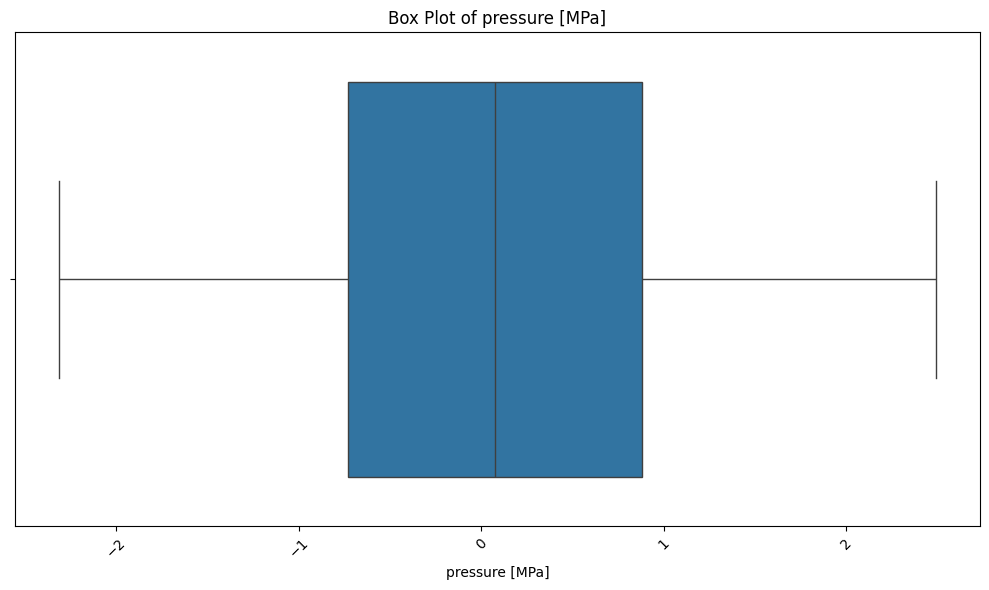

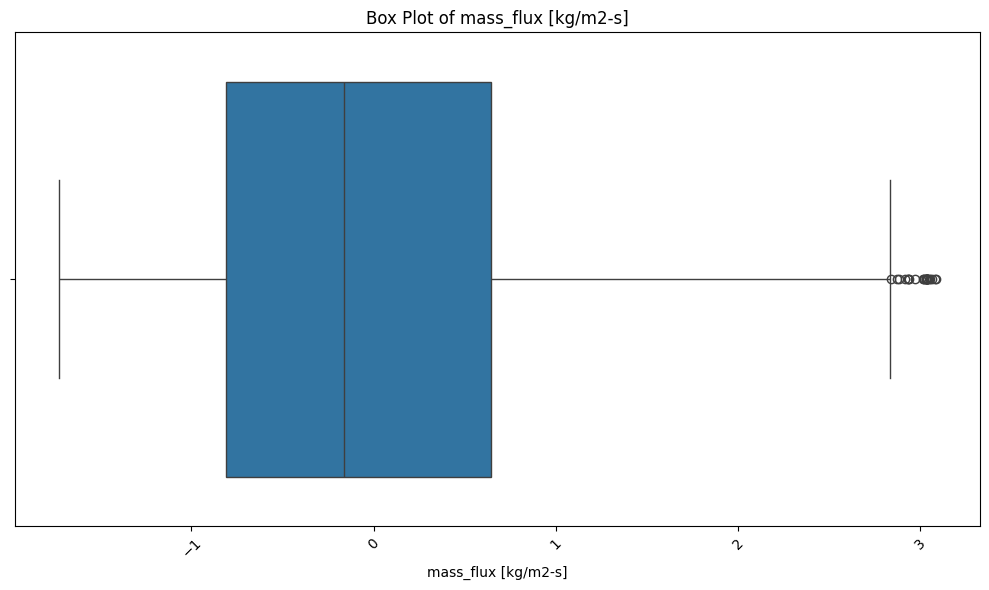

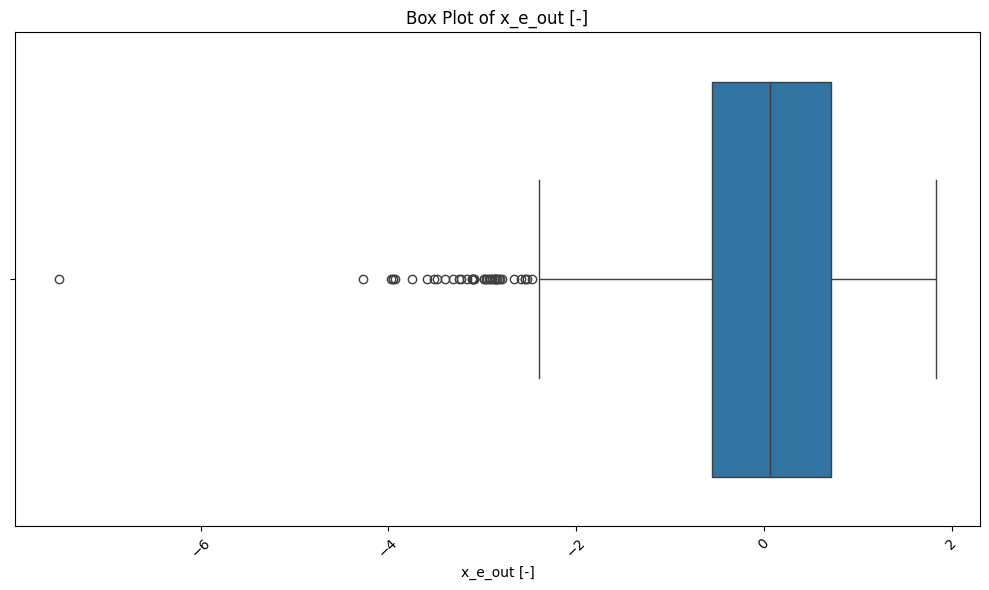

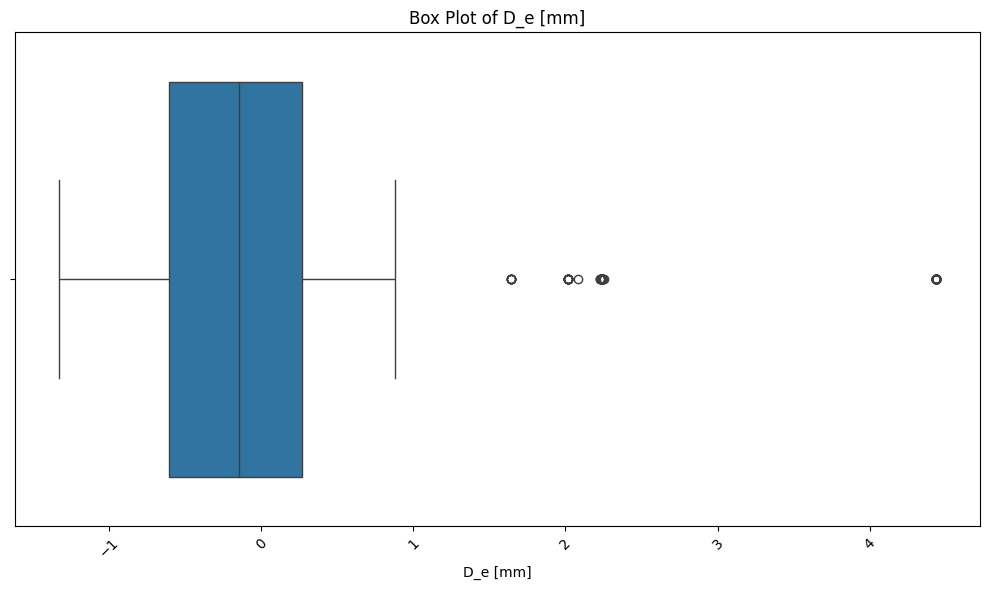

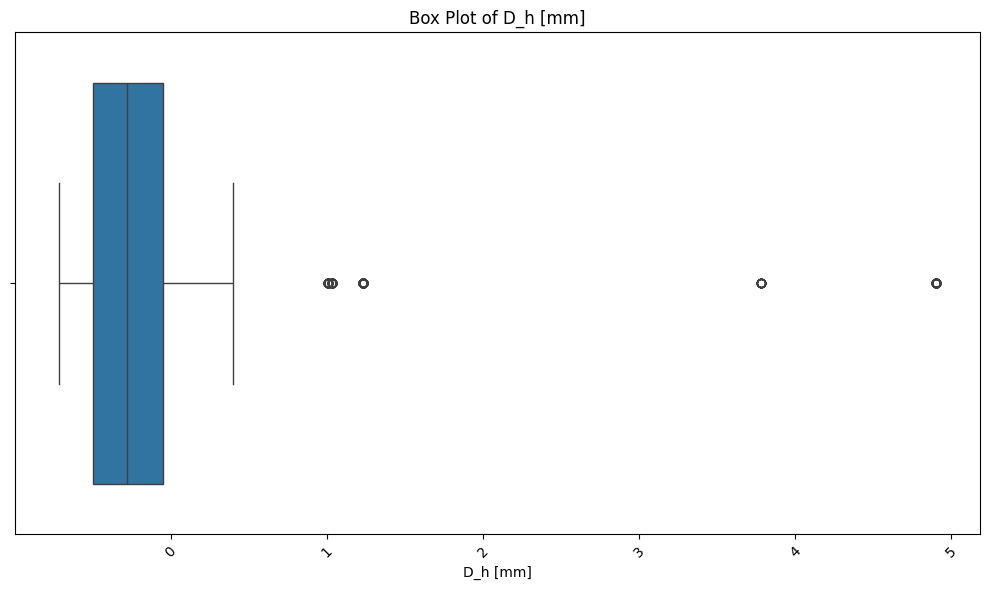

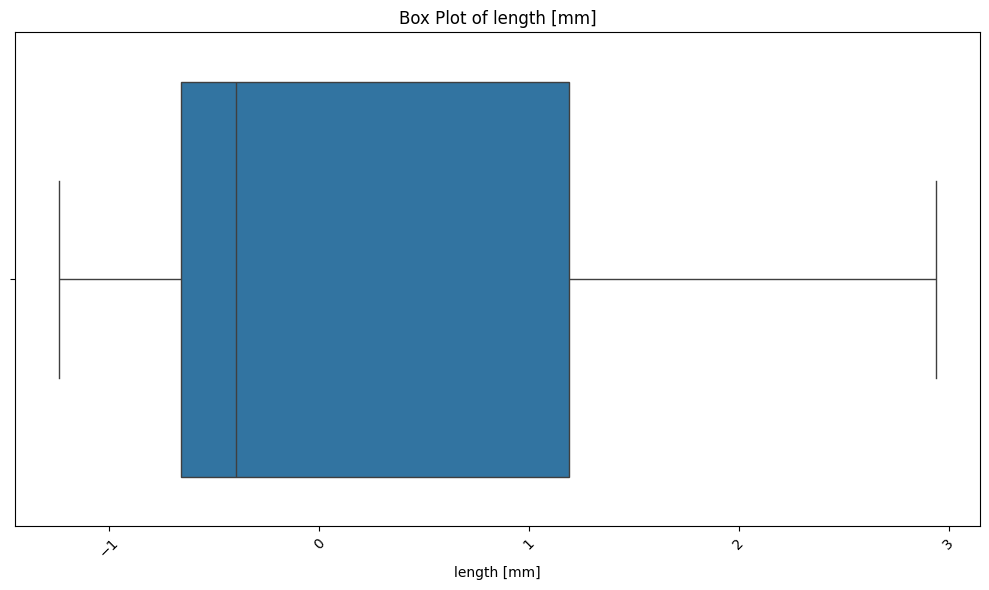

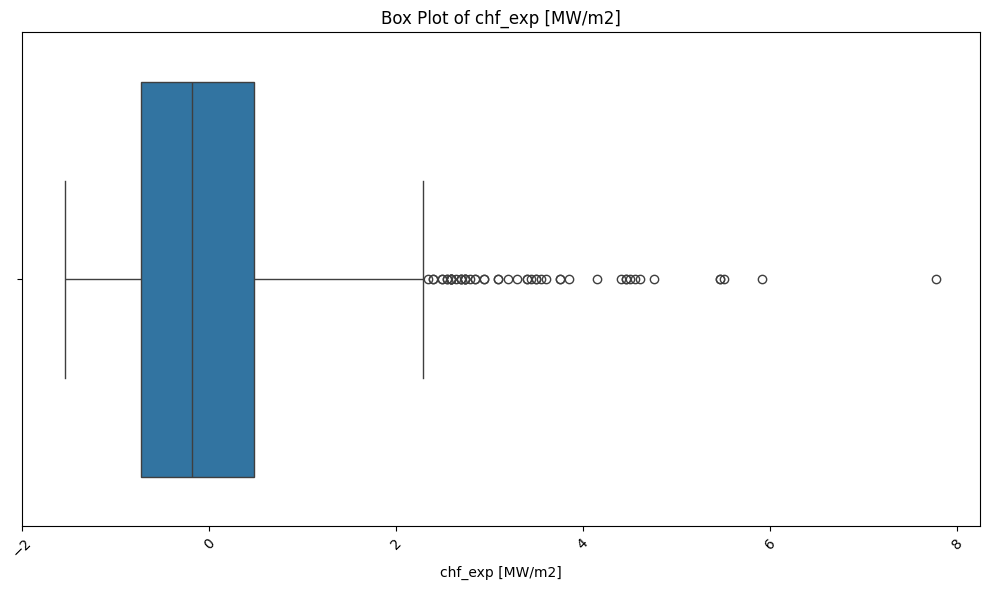

In [ ]:

for col in num_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title('Box Plot of {}'.format(col))
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig('visualisingplot.png')
  plt.show()


In [ ]:
for cols in df.columns:
  print(cols)


df['geometry']

geometry
pressure [MPa]
mass_flux [kg/m2-s]
x_e_out [-]
D_e [mm]
D_h [mm]
length [mm]
chf_exp [MW/m2]


0        tube
1        tube
2        tube
3        tube
4        tube
        ...  
1860    plate
1861    plate
1862    plate
1863    plate
1864    plate
Name: geometry, Length: 1865, dtype: object

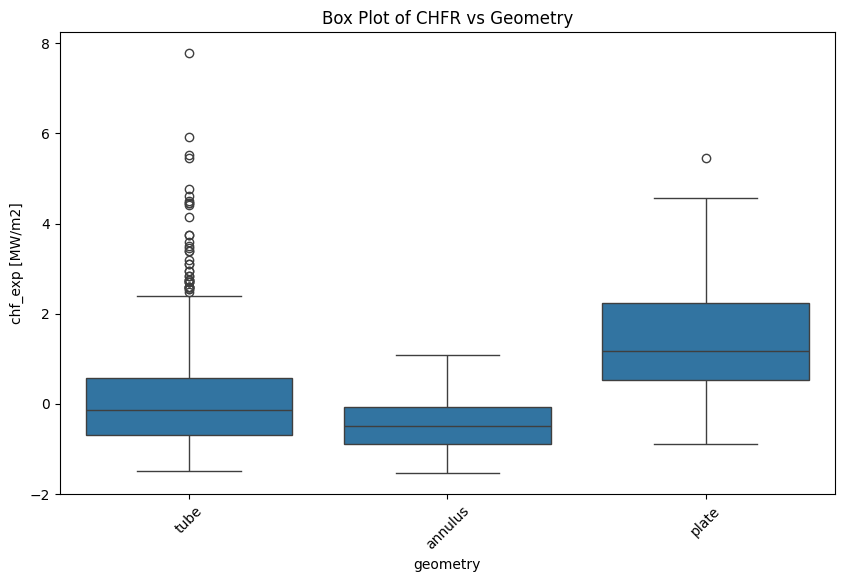

In [ ]:
#visualing outliers in geometry column
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['geometry'], y=df['chf_exp [MW/m2]'])
plt.title('Box Plot of CHFR vs Geometry')
plt.xticks(rotation=45)
plt.savefig('plt1.jpg')
plt.show()

As there are outliers in tubes geometry we need to removing them.

In [ ]:
#removing outliers from geometry
tube_df = df[df['geometry'] == 'tube']
z_scores = (tube_df['chf_exp [MW/m2]'] - tube_df['chf_exp [MW/m2]'].mean()) / tube_df['chf_exp [MW/m2]'].std()
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print("Indices of outliers:", outlier_indices)
df_cleaned = df.drop(outlier_indices)

Indices of outliers: [  0   1   3   4   6  29  30  35  40 141 142 143 766 769 914 916 927 928
 931]


After removing Outliers visualising

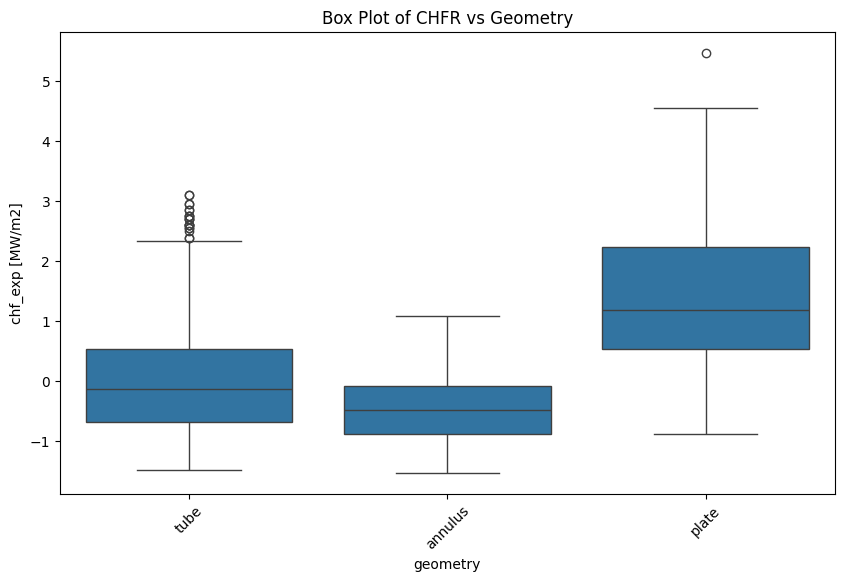

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['geometry'], y=df_cleaned['chf_exp [MW/m2]'])
plt.title('Box Plot of CHFR vs Geometry')
plt.xticks(rotation=45)
plt.savefig('plt2.jpg')
plt.show()

In [ ]:
df_cleaned.head()

,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
2,tube,-2.261076,0.867983,-0.473688,-1.013440,-0.621788,-1.116743,1.735696
5,tube,-2.188673,2.015348,-1.176408,-1.013440,-0.621788,-1.116743,2.189096
7,tube,-0.002557,-0.554750,-0.533240,0.092037,-0.291244,-0.703818,0.173986
8,tube,-0.002557,1.139727,-0.390314,0.092037,-0.291244,-0.345949,0.073230
9,tube,-0.002557,-1.124809,-0.050014,0.092037,-0.291244,-0.476709,0.224363


# Feature Engineering

Replacing the strings in geometry with 1,2 and 3. For easy feature engineering

In [ ]:

df_cleaned['geometry'] = df_cleaned['geometry'].replace(['tube','annulus','plate'],[1,2,3])


Visualising realations between features with correlation matrix

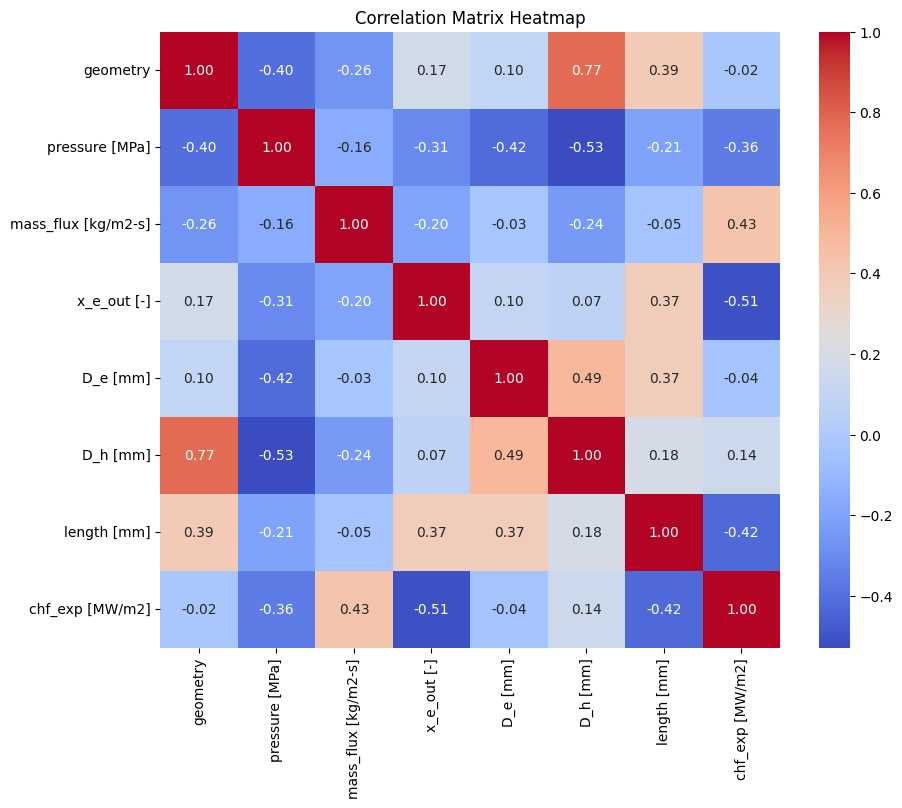

In [ ]:
#visualing via correlation matrix
correlation_matrix =df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation.jpg')
plt.show()


I have not performed **PCA** as there are not many features in my dataset and when i tried to perform it gave me worst results.

# Train Test Spliting

In [ ]:
#Splitting data into train and test
target = df_cleaned['chf_exp [MW/m2]']
df_cleaned = df_cleaned.drop('chf_exp [MW/m2]',axis=1)
X = df_cleaned;
y = target;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Model Selection And Evaluation :

Linear Regression


Shapiro-Wilk Test:
Test Statistic: 0.9990692734718323
P-value: 0.9064549803733826
The data looks Gaussian (fail to reject H0)


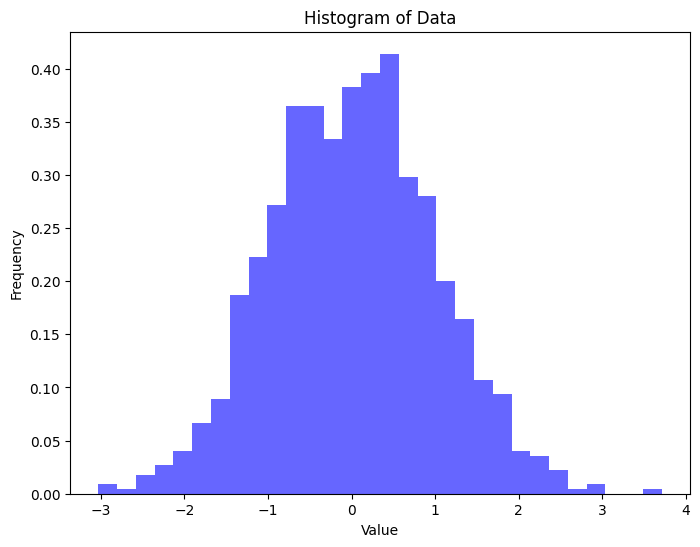

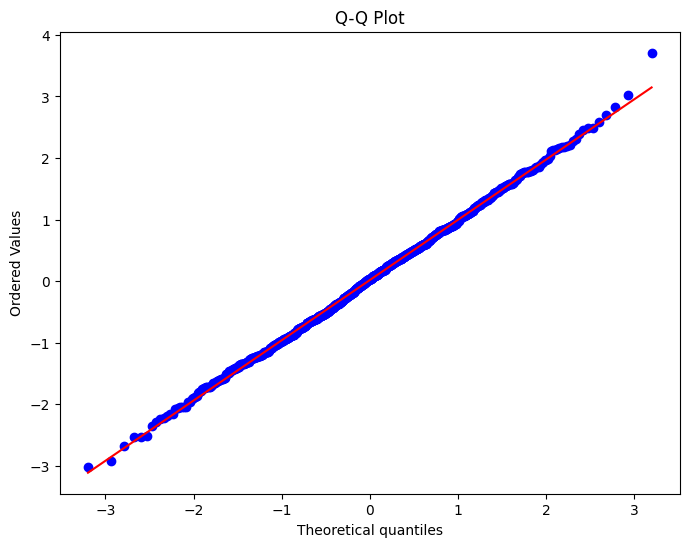

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate some random data
data = np.random.normal(loc=0, scale=1, size=1000)

# Histogram plot
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)
print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)
if p_value > 0.05:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")
plt.savefig('gaussian.jpg')
plt.show()


Since data is gaussian we can use linear regression

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2_lr = r2_score(y_test, y_pred)
print("R^2 Score:", r2_lr)


Mean Squared Error: 0.21772258449795237
R^2 Score: 0.721484782204778


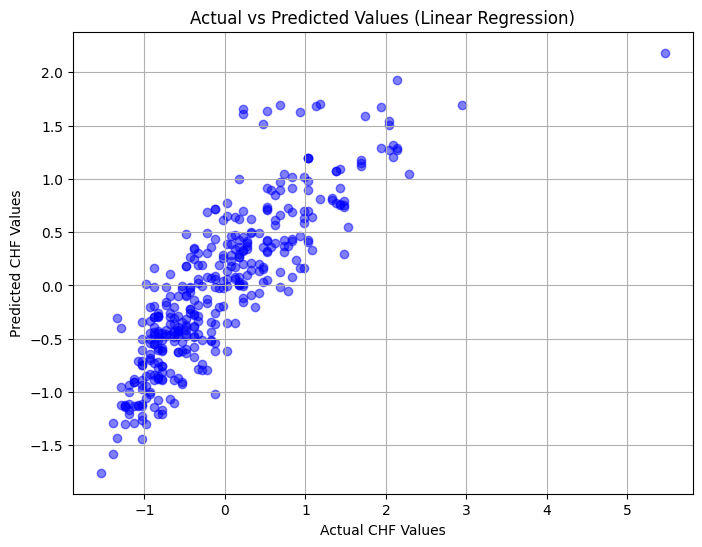

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual CHF Values')
plt.ylabel('Predicted CHF Values')
plt.grid(True)
plt.savefig('linearreg.jpg')
plt.show()

**There are no hyperparamaeters in vanilla linear regression so no need for tuning.**

RandomForestRegression

In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=12)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_rfr = r2_score(y_test, y_pred)
print("R^2 Score:", r2_rfr)


Mean Squared Error: 0.061423630253565925
R^2 Score: 0.9214256261136474


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=12), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_rfrt = r2_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("R^2 Score:", r2_rfrt)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R^2 Score: 0.922321950719067


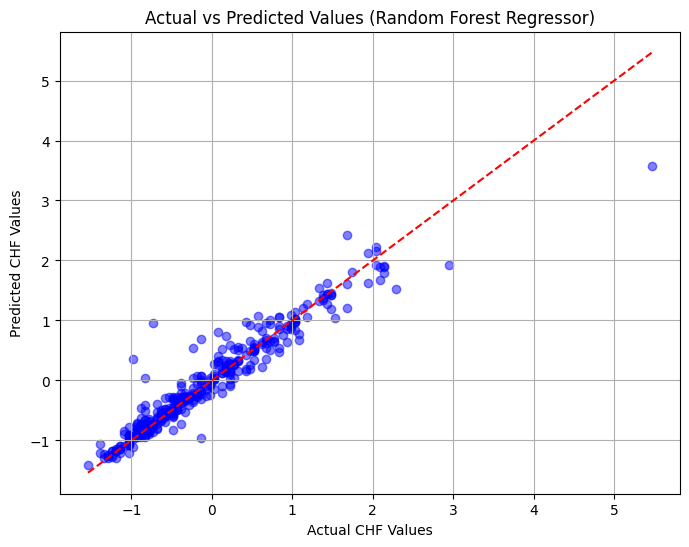

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual CHF Values')
plt.ylabel('Predicted CHF Values')
plt.grid(True)
plt.savefig('randomforestreg.jpg')
plt.show()

XGBoost

In [ ]:
import xgboost as xgb
df_xg = df_cleaned;
df_xg.columns = [col.replace('[', '').replace(']', '') for col in df_xg.columns]



X = df_xg;
y = target;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=12)  # You can adjust parameters as needed
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_xgb = r2_score(y_test, y_pred)
print("R^2 Score:", r2_xgb)


Mean Squared Error: 0.04328026421834368
R^2 Score: 0.9446349939175919


In [ ]:
from xgboost import XGBRegressor
X = df_xg;
y = target;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],                     # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],              # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],               # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0]         # Subsample ratio of columns when constructing each tree
}


grid_search = GridSearchCV(XGBRegressor(random_state=12), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_xgbt = r2_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("R^2 Score:", r2_xgbt)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
R^2 Score: 0.9440966902964895


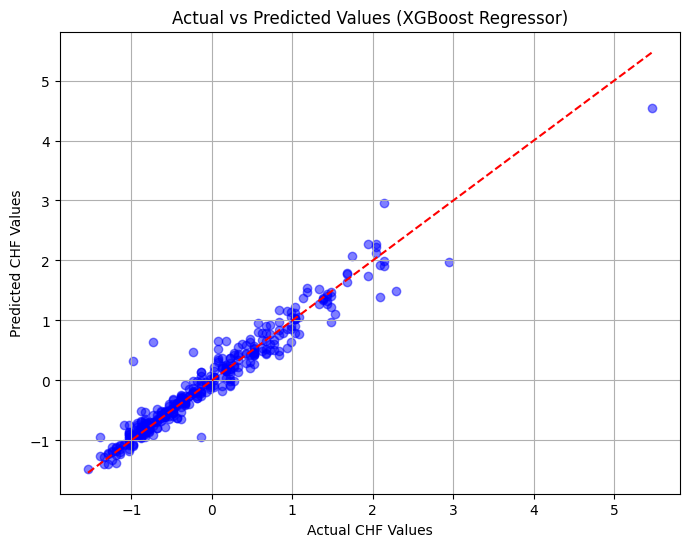

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values (XGBoost Regressor)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CHF Values')
plt.ylabel('Predicted CHF Values')
plt.grid(True)
plt.savefig('XGBreg.jpg')
plt.show()

ElasticNet

In [ ]:

from sklearn.linear_model import ElasticNet
X = df_cleaned;
y = target;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=12)  # You can adjust parameters as needed
elastic_net.fit(X_train, y_train)


y_pred = elastic_net.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2_enet = r2_score(y_test, y_pred)
print("R^2 Score:", r2_enet)


Mean Squared Error: 0.24463921723521043
R^2 Score: 0.6870524708007126


In [ ]:

X = df_cleaned;
y = target;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],     # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]         # L1 ratio (mixing parameter)
}

grid_search = GridSearchCV(ElasticNet(random_state=12), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_enett = r2_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("R^2 Score:", r2_enett)


Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.1}
R^2 Score: 0.7215798430090583


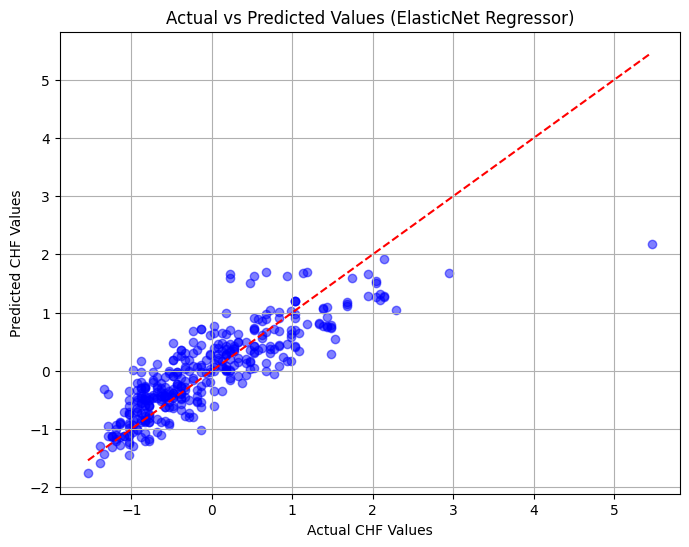

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (ElasticNet Regressor)')
plt.xlabel('Actual CHF Values')
plt.ylabel('Predicted CHF Values')
plt.grid(True)
plt.savefig('elasticnet.jpg')
plt.show()

Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)


y_pred = ridge_model.predict(X_test)


r2_ridge = r2_score(y_test, y_pred)
print("R^2 Score:", r2_ridge)


R^2 Score: 0.7215262678046732


In [ ]:

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}


grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_ridget = r2_score(y_test, y_pred)
print("Best alpha:", best_alpha)
print("R^2 Score:", r2_ridget)


Best alpha: 1
R^2 Score: 0.7215262678046732


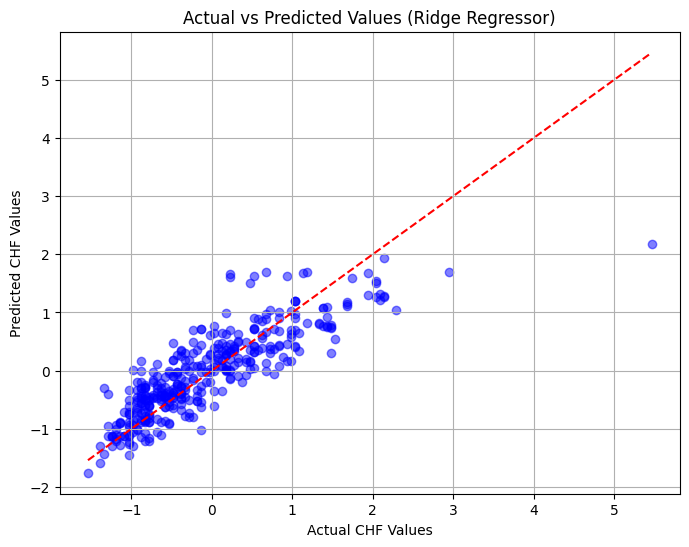

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Ridge Regressor)')
plt.xlabel('Actual CHF Values')
plt.ylabel('Predicted CHF Values')
plt.grid(True)
plt.savefig('ridgereg.jpg')
plt.show()

# Results

Visualising results into graphs and tables

In [ ]:
from tabulate import tabulate

models = ['Linear Regression', 'Random Forest', 'XGBoost', 'ElasticNet' , 'Ridge Reg']
r2_scores = [r2_lr, r2_rfr , r2_xgb,r2_enet, r2_ridge];


table = tabulate(zip(models, r2_scores), headers=['Model', 'R^2 Score'], tablefmt='grid')


print(table)

+-------------------+-------------+
| Model             |   R^2 Score |
+===================+=============+
| Linear Regression |    0.721485 |
+-------------------+-------------+
| Random Forest     |    0.921426 |
+-------------------+-------------+
| XGBoost           |    0.944635 |
+-------------------+-------------+
| ElasticNet        |    0.687052 |
+-------------------+-------------+
| Ridge Reg         |    0.721526 |
+-------------------+-------------+


In [ ]:
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'ElasticNet' , 'Ridge Reg']
r2_scores = [r2_lr, r2_rfr , r2_xgb,r2_enet, r2_ridge];
r2_aftertuning = [r2_lr, r2_rfrt , r2_xgbt,r2_enett, r2_ridget]

table = tabulate(zip(models, r2_scores ,r2_aftertuning ), headers=['Model', 'R^2 Score' , 'R^2 After Tuning'], tablefmt='grid')

print(table)

+-------------------+-------------+--------------------+
| Model             |   R^2 Score |   R^2 After Tuning |
+===================+=============+====================+
| Linear Regression |    0.721485 |           0.721485 |
+-------------------+-------------+--------------------+
| Random Forest     |    0.921426 |           0.922322 |
+-------------------+-------------+--------------------+
| XGBoost           |    0.944635 |           0.944097 |
+-------------------+-------------+--------------------+
| ElasticNet        |    0.687052 |           0.72158  |
+-------------------+-------------+--------------------+
| Ridge Reg         |    0.721526 |           0.721526 |
+-------------------+-------------+--------------------+


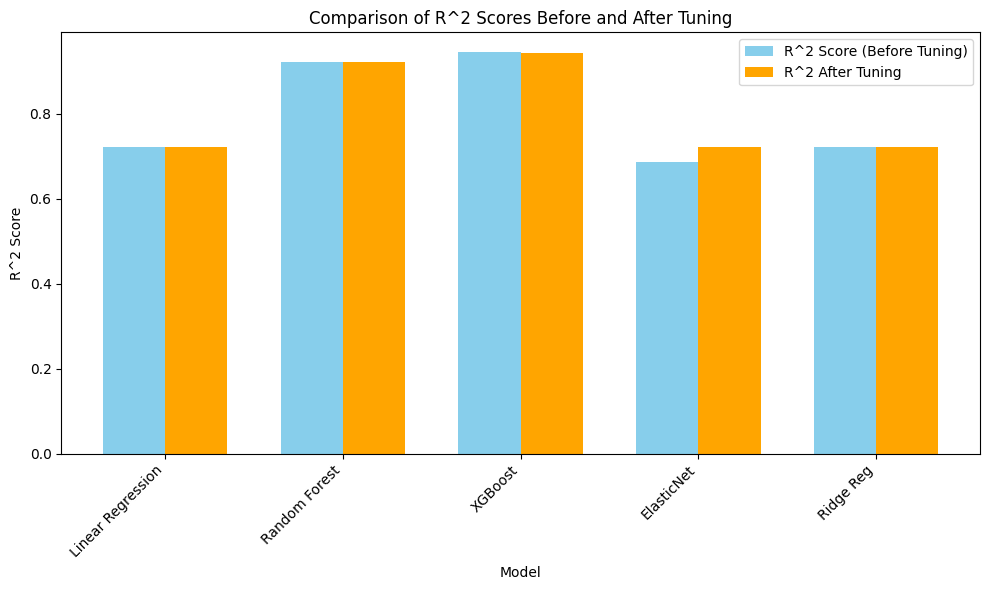

In [ ]:

bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, r2_scores, bar_width, color='skyblue', label='R^2 Score (Before Tuning)')
plt.bar(index + bar_width/2, r2_aftertuning, bar_width, color='orange', label='R^2 After Tuning')

plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores Before and After Tuning')
plt.xticks(index, models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('comparision.jpg')
plt.show()
